In [1]:
import draw2Svg as dw

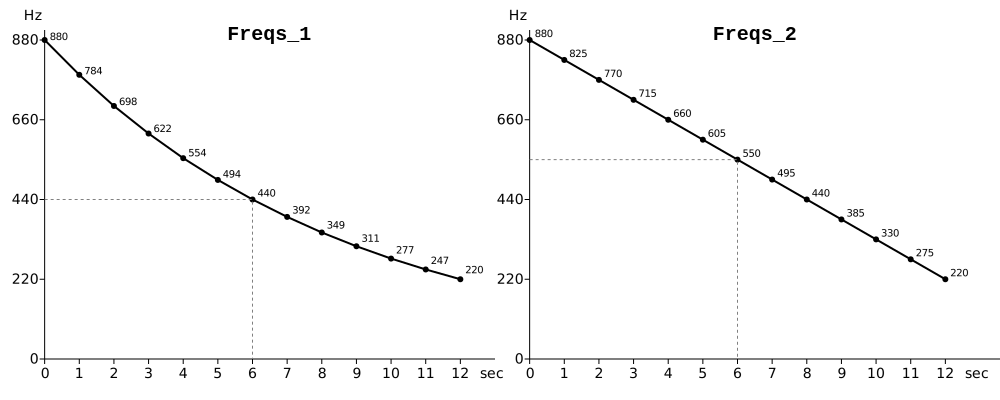

In [2]:
w,h = 1000,400
d = dw.Drawing(w,h)

def grid(num,length=800,margin_1=40,margin_2=41):
    """returns a list of num grid values between
    margin_1 and height-margin_2 which are subtracted from length.
    for horizontal, it counts from left to right
    for vertical, it counts from top to bottom"""
    real_length = length - margin_1 - margin_2
    grid_step = real_length / (num-1)
    return [i*grid_step+margin_1 for i in range(num)]

def tick(x,y,leng=-5,**args):
    """axes tick
    leng negative means from x,y to left
    leng positive menas to bottom"""
    if leng<0: d.append(dw.Line(x,y,x+leng,y,**args))
    else: d.append(dw.Line(x,y,x,y+leng,**args))
    

x_grid = grid(29,w,10,20)
y_grid = grid(5,h)

# axes
zero_left = x_grid[1],y_grid[4]
zero_right = x_grid[15],y_grid[4]
d.append(dw.Line(*zero_left,x_grid[14],y_grid[4],stroke='black'))
d.append(dw.Line(*zero_left,x_grid[1],y_grid[0]-10,stroke='black'))
d.append(dw.Line(*zero_right,w,y_grid[4],stroke='black'))
d.append(dw.Line(*zero_right,x_grid[15],y_grid[0]-10,stroke='black'))

# ticks and text for axes
size = 14
y_text = ['%d'%i for i in range(880,-1,-220)]
x_text = ['%d'%i for i in range(13)]
for i,y in enumerate(y_grid):
    tick(x_grid[1],y,stroke='black')
    d.append(dw.Text(y_text[i],size,x_grid[1]-7,y-1,text_anchor='end',valign='middle'))
    tick(x_grid[15],y,stroke='black')
    d.append(dw.Text(y_text[i],size,x_grid[15]-7,y-1,text_anchor='end',valign='middle'))
for i,num in enumerate(x_text):
    tick(x_grid[i+1],y_grid[4],5,stroke='black')
    d.append(dw.Text(num,size,x_grid[i+1],y_grid[4]+5,text_anchor='middle',valign='top'))
    tick(x_grid[i+15],y_grid[4],5,stroke='black')
    d.append(dw.Text(num,size,x_grid[i+15],y_grid[4]+5,text_anchor='middle',valign='top'))
d.append(dw.Text('Hz',size,x_grid[1]-3,y_grid[0]-20,text_anchor='end'))
d.append(dw.Text('Hz',size,x_grid[15]-3,y_grid[0]-20,text_anchor='end'))
d.append(dw.Text('sec',size,x_grid[14]-15,y_grid[4]+5,valign='top'))
d.append(dw.Text('sec',size,x_grid[28]-15,y_grid[4]+5,valign='top'))

# points
freqs1 = [880,784,698,622,554,494,440,392,349,311,277,247,220]
freqs2 = [880,825,770,715,660,605,550,495,440,385,330,275,220]
psiz = 3
xfreqs1 = []
yfreqs1 = []
y_range = (y_grid[4]-y_grid[0])
tsiz = 10
for i in range(13):
    y = y_grid[4]-(freqs1[i]/880)*y_range
    xfreqs1.append(x_grid[i+1])
    yfreqs1.append(y)
    d.append(dw.Circle(x_grid[i+1],y,psiz))
    d.append(dw.Text('%d'%freqs1[i],tsiz,x_grid[i+1]+5,y-i/2))
    y = y_grid[4]-(freqs2[i]/880)*y_range
    d.append(dw.Circle(x_grid[i+15],y,psiz))
    d.append(dw.Text('%d'%freqs2[i],tsiz,x_grid[i+15]+5,y-3))

# line for freqs2
d.append(dw.Line(x_grid[15],y_grid[0],x_grid[27],y_grid[3],stroke='black',stroke_width=2))

# curve for freqs1
#print(xfreqs1,yfreqs1)
dx = xfreqs1[1] - xfreqs1[0]
p = dw.Path(stroke='black',fill='none',stroke_width=2)
p.M(xfreqs1[0],yfreqs1[0])
for i in range(12):
    dy = yfreqs1[i+1]-yfreqs1[i]
    p.Q(xfreqs1[i]+dx/2,yfreqs1[i]+dy/2,xfreqs1[i+1],yfreqs1[i+1])
d.append(p)

# final text
big = 20
d.append(dw.Text('Freqs_1',big,x_grid[1]+(x_grid[14]-x_grid[1])/2,y_grid[0],
                 text_anchor='middle',font_family='courier',font_weight='bold'))
d.append(dw.Text('Freqs_2',big,x_grid[15]+(x_grid[28]-x_grid[15])/2,y_grid[0],
                 text_anchor='middle',font_family='courier',font_weight='bold'))

# dotted lines at 6 seconds
d.append(dw.Lines(x_grid[1],y_grid[2],x_grid[7],y_grid[2],x_grid[7],y_grid[4],
                  fill='none',stroke='gray',stroke_dasharray='3 3'))
d.append(dw.Lines(x_grid[15],y_grid[2]-y_range/8,x_grid[21],y_grid[2]-y_range/8,x_grid[21],y_grid[4],
                  fill='none',stroke='gray',stroke_dasharray='3 3'))

d.savePng('../../images/01-GS-05-b.png')
d